# 데이터셋 준비

In [0]:
!unzip /content/drive/My\ Drive/Datasets/RocoPicker_dataset.zip -d dataset

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: dataset/__MACOSX/RocoPicker_dataset/train/Roco/._2595.jpg  
  inflating: dataset/RocoPicker_dataset/train/Roco/0382.jpg  
  inflating: dataset/__MACOSX/RocoPicker_dataset/train/Roco/._0382.jpg  
  inflating: dataset/RocoPicker_dataset/train/Roco/1261.png  
  inflating: dataset/__MACOSX/RocoPicker_dataset/train/Roco/._1261.png  
  inflating: dataset/RocoPicker_dataset/train/Roco/0619.png  
  inflating: dataset/__MACOSX/RocoPicker_dataset/train/Roco/._0619.png  
  inflating: dataset/RocoPicker_dataset/train/Roco/1275.png  
  inflating: dataset/__MACOSX/RocoPicker_dataset/train/Roco/._1275.png  
  inflating: dataset/RocoPicker_dataset/train/Roco/2542.jpg  
  inflating: dataset/__MACOSX/RocoPicker_dataset/train/Roco/._2542.jpg  
  inflating: dataset/RocoPicker_dataset/train/Roco/0180.png  
  inflating: dataset/__MACOSX/RocoPicker_dataset/train/Roco/._0180.png  
  inflating: dataset/RocoPicker_dataset/train/Roco/0355.jpg  
  inflating: datase

# 텐서플로우 2.0설치;

In [0]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 54kB/s 
     |████████████████████████████████| 3.8MB 35.4MB/s 
     |████████████████████████████████| 450kB 45.0MB/s 
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [0]:
import tensorflow as tf

In [0]:
tf.__version__

'2.0.0'

# 필요한 모듈 임포트

In [0]:
import numpy as np
import matplotlib.pyplot as plt
keras = tf.keras

# 이미지 제너레이터 생성

In [0]:
import pathlib
train_dir = pathlib.Path('dataset/RocoPicker_dataset/train')
num_of_train_images = len(list(train_dir.glob("*/*.png"))) + len(list(train_dir.glob("*/*.jpg")))
num_of_train_images

4551

In [0]:
imageGenerator = keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rescale=1.0/255.0,rotation_range=90)
#  width_shift_range=.0,
#     height_shift_range=50.0,

# 하이퍼파라미터

In [0]:
IMAGE_HEIGHT = 299 #https://towardsdatascience.com/review-xception-with-depthwise-separable-convolution-better-than-inception-v3-image-dc967dd42568
IMAGE_WIDTH = 299
BATCH_SIZE = 20

# 이미지 배치 데이터 생성

In [0]:
generated_train_data = imageGenerator.flow_from_directory(train_dir, target_size=(IMAGE_HEIGHT, IMAGE_WIDTH), color_mode='rgb', classes=['Roco', 'Not_Roco'], batch_size = BATCH_SIZE, shuffle=True)

Found 4551 images belonging to 2 classes.


In [0]:
val_dir = pathlib.Path('dataset/RocoPicker_dataset/validation')
generated_validation_data = imageGenerator.flow_from_directory(val_dir,  target_size=(IMAGE_HEIGHT, IMAGE_WIDTH), color_mode='rgb', classes=['Roco', 'Not_Roco'], batch_size = BATCH_SIZE, shuffle=True)

Found 400 images belonging to 2 classes.


# 배치 데이터 확인

In [0]:
CLASS_NAMES = np.array(['Roco','Not_Roco'])

In [0]:
CLASS_NAMES

array(['Roco', 'Not_Roco'], dtype='<U8')

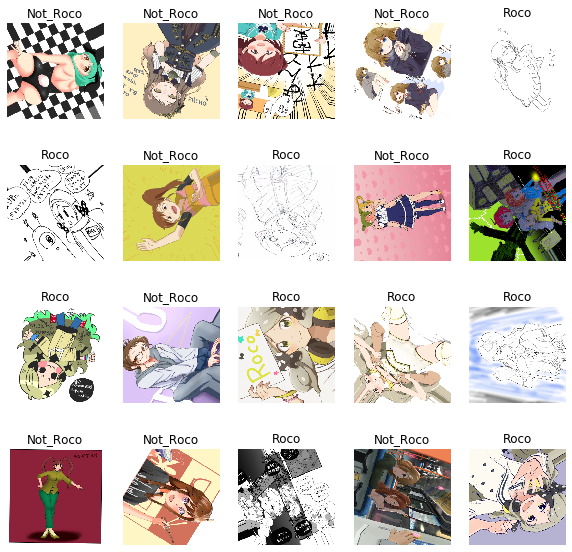

In [0]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10)) # 이미지 크기를 10, 10 으로 조정
  for n in range(20):
    ax = plt.subplot(4, 5, n+1) # 5행 5열로 잡은 것 중 n+1번째에 그림을 그림.
    plt.imshow(image_batch[n])  # 이미지 표시
    plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
    plt.axis('off')
# ------------------------------------------------------------------

import matplotlib.pyplot as plt

image_batch, label_batch = next(generated_train_data)
show_batch(image_batch, label_batch)

In [0]:
print(label_batch[6])

[1. 0.]


In [0]:
plt.imshow(image_batch[6])

# 모델 생성
https://www.tensorflow.org/tutorials/images/transfer_learning?hl=ko

In [0]:
IMG_SHAPE = (299,299,3)

base_model = tf.keras.applications.Xception(input_shape = IMG_SHAPE, include_top = False)

83689472/83683744 [==============================] - 1s 0us/step


In [0]:
base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [0]:
base_model.trainable = False

In [0]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [0]:
global_average_layer = GlobalAveragePooling2D()
prediction_layer = Dense(2, activation="softmax")

In [0]:
model = tf.keras.Sequential([
                             base_model,
                             global_average_layer,
                             prediction_layer
])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 10, 10, 2048)      20861480  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 4098      
Total params: 20,865,578
Trainable params: 4,098
Non-trainable params: 20,861,480
_________________________________________________________________


In [0]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

# 모델 로드

In [0]:
model = keras.models.load_model('/content/drive/My Drive/trained_model/rocopicker2_RMS')

# 모델 학습

In [0]:
MODEL_DIR = "/content/drive/My\ Drive/trained_model/roco_picker"

In [0]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='/content/drive/My Drive/trained_model/rocopicker2_RMS',
        monitor='val_loss',
        save_best_only=True,
        verbose=1)
]

model.fit(generated_train_data, callbacks=callbacks, epochs=10, validation_data=generated_validation_data)

Train for 228 steps, validate for 20 steps
Epoch 1/10
100/228 [============>.................] - ETA: 30:39 - loss: 0.4521 - accuracy: 0.7775

In [0]:
model.save('/content/drive/My Drive/trained_model/rocopicker2_RMS2')

# 사진을 이용한 평가

In [0]:
import cv2

im = cv2.imread("/content/check11.jpg").astype(np.float32) # 이미지 로드
im = im * (1.0/255.0) # 이미지 정규화
resized_img = cv2.resize(im, (299,299)) # 이미지 크기를 맞게 변형
rgb_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)
expdim_img = np.expand_dims(rgb_img, axis=0) # 배치는 1개

In [0]:
predict = model.predict(expdim_img)
predict

array([[0.31038186, 0.6896181 ]], dtype=float32)

# Model evaluate (for debugging)

In [0]:
model.evaluate(generated_validation_data)

20/20 [==============================] - 225s 11s/step - loss: 0.5259 - accuracy: 0.7375


[0.5258844941854477, 0.7375]

In [0]:
model.inputs

[<tf.Tensor 'input_1:0' shape=(None, 299, 299, 3) dtype=float32>]